In [5]:
from scipy import ndimage
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

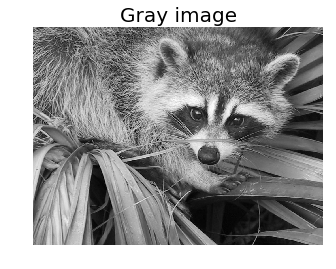

In [6]:
gray_image = misc.face(gray=True)

plt.imshow(gray_image, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gray image', fontsize=20)
plt.show()

In [23]:
dx = [1, 1, 0, -1, -1, -1, 0, 1]
dy = [0, -1, -1, -1, 0, 1, 1, 1]

def calculate_lbp_matrix(image):
    w = len(image[1,:])
    h = len(image[:,1])
    m = np.zeros((h, w), int)
    s = np.zeros((256), int)
    for i in range(h):
        for j in range(w):
            val = 0
            for k in range(8):
                if image[i, j] >= image[(i + dx[k]) % h, (j + dy[k]) % w]:
                    val += 2 ** k
            m[i][j] = val
            s[val] += 1
    return m, s

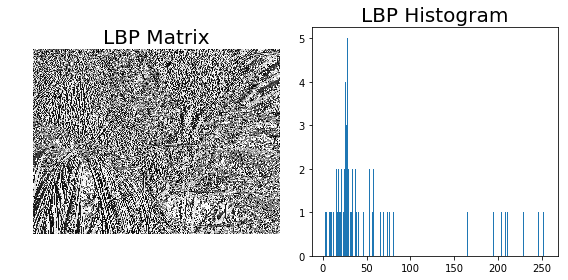

In [25]:
lbp_matrix, histogram = calculate_lbp_matrix(gray_image)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax1.imshow(lbp_matrix, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('LBP Matrix', fontsize=20)

ax2.hist(histogram, 256, [0,256])
ax2.set_title('LBP Histogram', fontsize=20)

fig.tight_layout()
plt.show()